# Seoul Bike Sharing Lab

### Introduction

In this lesson, we'll use our knowledge of working with data to analyze the Seoul bike sharing system.

The Seoul bike sharing system, has over 800 stations all across Seoul. And it is used by many to move about in the city. We'll explore this data to try to better understand how these bikes are used, which we can use as a case study for understanding bike systems more broadly.

### Loading our data

Let's read in the data

In [2]:
import pandas as pd
df = pd.read_csv("./SeoulBikeData.csv", encoding='unicode_escape')
df[:2]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


And then we can coerce this to a list of dictionaries.

In [3]:
bike_hours = df.to_dict('records')

### Exploring our data

Ok, let's start off by exploring our dataset.  Select the first element from the list of dictionaries below.

In [4]:
first_record = bike_hours[0]

print(first_record)

{'Date': '01/12/2017', 'Rented Bike Count': 254, 'Hour': 0, 'Temperature(°C)': -5.2, 'Humidity(%)': 37, 'Wind speed (m/s)': 2.2, 'Visibility (10m)': 2000, 'Dew point temperature(°C)': -17.6, 'Solar Radiation (MJ/m2)': 0.0, 'Rainfall(mm)': 0.0, 'Snowfall (cm)': 0.0, 'Seasons': 'Winter', 'Holiday': 'No Holiday', 'Functioning Day': 'Yes'}


And then to make this easier, let's just display the keys of our `first_record`.

In [5]:
record_keys = first_record.keys()

record_keys

dict_keys(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day'])

Ok so we can see that we have keys of `Date`, `Rented Bike Count`, and `Hour` among others.  At this point we can identify the **grain** of the data.

By the grain of the data, we mean, what does each record represent.  In this case, each record indicates the number of bikes in a given hour.  Then the other attributes like windspeed and rainfall describe weather conditions of that hour.

* A discrepancy?

It looks like there may be some overlap in our keys.  Notice that the last two attributes are `'Holiday'`, and `'Functioning Day'`. Do these represent the same thing?  

Begin by creating a list of all of the values for `Holiday`.  And then create a list for all of the values for `Functioning Day`.  Slice the first five records.

In [29]:
holidays = []
for bike_hour in bike_hours:
    holidays.append(bike_hour['Holiday'])

holidays[:5]

['No Holiday', 'No Holiday', 'No Holiday', 'No Holiday', 'No Holiday']

And then let's do the same thing for `'Functioning Day'`.

In [32]:
functioning_days = []
for bike_hour in bike_hours:
    functioning_days.append(bike_hour['Functioning Day'])

functioning_days[:5]

['Yes', 'Yes', 'Yes', 'Yes', 'Yes']

Ok, so it looks like, perhaps, when there is `No Holiday` that the value of functioning day is `Yes`.

Let's do a little more digging --  find all possible values relating to `Holiday`.

In [31]:
set(holidays)

{'Holiday', 'No Holiday'}

And find all of the values relating to `Functioning Day`.

In [33]:
set(functioning_days)

{'No', 'Yes'}

Ok so they both have two values.  And remember our thought is that when holiday is `No Holiday`, that functioning day's value is always `Yes`.

In [38]:
holidays[:4] 
# ['No Holiday', 'No Holiday', 'No Holiday', 'No Holiday']
functioning_days[:4]
# ['Yes', 'Yes', 'Yes', 'Yes']

['Yes', 'Yes', 'Yes', 'Yes']

So below, let's check this by creating a list of all of the records where there is a mismatch.  That is where we have:
* `No Holiday` and `No`, or
* `Holiday` and `Yes`.

In [49]:
mismatches = []

for bike_hour in bike_hours:
    if (bike_hour['Holiday'] == 'No Holiday' and bike_hour['Functioning Day'] == 'No') or\
        (bike_hour['Holiday'] == 'Holiday' and bike_hour['Functioning Day'] == 'Yes'):
        mismatches.append(bike_hour)
mismatches[:1]

# [{'Date': '22/12/2017', 'Rented Bike Count': 196, 'Hour': 0, 'Temperature(°C)': -1.7, 'Humidity(%)': 79, 'Wind speed (m/s)': 0.5, 'Visibility (10m)': 794, 'Dew point temperature(°C)': -4.8, 'Solar Radiation (MJ/m2)': 0.0, 'Rainfall(mm)': 0.0, 'Snowfall (cm)': 0.8, 'Seasons': 'Winter', 'Holiday': 'Holiday', 'Functioning Day': 'Yes'}]

[{'Date': '22/12/2017',
  'Rented Bike Count': 196,
  'Hour': 0,
  'Temperature(°C)': -1.7,
  'Humidity(%)': 79,
  'Wind speed (m/s)': 0.5,
  'Visibility (10m)': 794,
  'Dew point temperature(°C)': -4.8,
  'Solar Radiation (MJ/m2)': 0.0,
  'Rainfall(mm)': 0.0,
  'Snowfall (cm)': 0.8,
  'Seasons': 'Winter',
  'Holiday': 'Holiday',
  'Functioning Day': 'Yes'}]

Ok, so we can see that we do have some mismatches.  That is Holiday and Functioning Day do not contain the same information.

### Checking the dataset

Now that we've used the keys to identify the grain of the data, the next step, we can check the completeness, and the time range that the dataset includes.  

* Completeness

A good way to determine the completeness of the data is to first make sure that we have records for all seasons.  Assign a set representing the unique seasons to a the variable below.

In [50]:
unique_seasons = set([bike_hour['Seasons'] for bike_hour in bike_hours])
unique_seasons

{'Autumn', 'Spring', 'Summer', 'Winter'}

Ok, so we do have records from each season.  Let's also find the range of dates that our data spans.  First return the earliest date in the dataset, and then return the latest date in the dataset.  But before we do, let's take a look at the data.

In [59]:
bike_hours[1]['Date']

'01/12/2017'

Ok, so this is a little tricky, because the data is currently listed as day month year. So if try to sort the data, or use a function like max, it will return results in the wrong order.

Let's see this below.

In [62]:
max(['03/12/2016', '01/12/2017'])

'03/12/2016'

This is because the data is effectively sorted alphabetically, so the string beginning with `03` is larger than the string beginning `01`.  So let's change our data to be `year/month/day`.

First perform this for one record.

In [69]:
sample_date = '03/12/2016'

'/'.join(list(reversed(sample_date.split('/'))))

# '2016/12/03'

'2016/12/03'

Ok, and once we solved this for one element let's perform this for all elements and store this in a list.

Ok this is a little tricky, because our dates are currently indicated by day month year.  So instead change each date to be a format of year 

Let's do some data clean up, try to find any missing values

In [28]:
# Initialize a list to keep track of rows with missing values
rows_with_missing = []

# Check each row for missing data
for i, record in enumerate(bike_data):
    # Check each field in the row
    for key, value in record.items():
        if value is None or value == '':
            # If a missing value is found, add the row number and field name to our list
            rows_with_missing.append((i, key))

# Output the result
if rows_with_missing:
    for row, field in rows_with_missing:
        print(f"Missing value found at row {row + 1}, field '{field}'.")
else:
    print("No missing values found.")

No missing values found.


### Let's do some pattern finding 
Okay, now that we understand what each column really means, let's try to find the average bike rental count for each hour of the day.
Maybe there are peak hours like the mornings and the evening when people travel to and from work.

In [60]:
#Calculate the average bike rental count for each hour of the day

# Initialize a dictionary to store total bike counts and another for the number of records for each hour
hourly_counts = {hour: 0 for hour in range(24)}
hourly_records = {hour: 0 for hour in range(24)}

# Populate the dictionaries
for record in bike_data:
    hour = record['Hour']
    hourly_counts[hour] += record['Rented Bike Count']
    hourly_records[hour] += 1

# Calculate the average bike rental count for each hour
# hourly_averages = {hour: hourly_counts[hour] / hourly_records[hour] for hour in range(24)}

# # Print the results
# for hour, average in hourly_averages.items():
#     print(f"Hour {hour}: Average Rented Bike Count = {average:.2f}")


Can you graph it? That would make it easier to see the pattern.

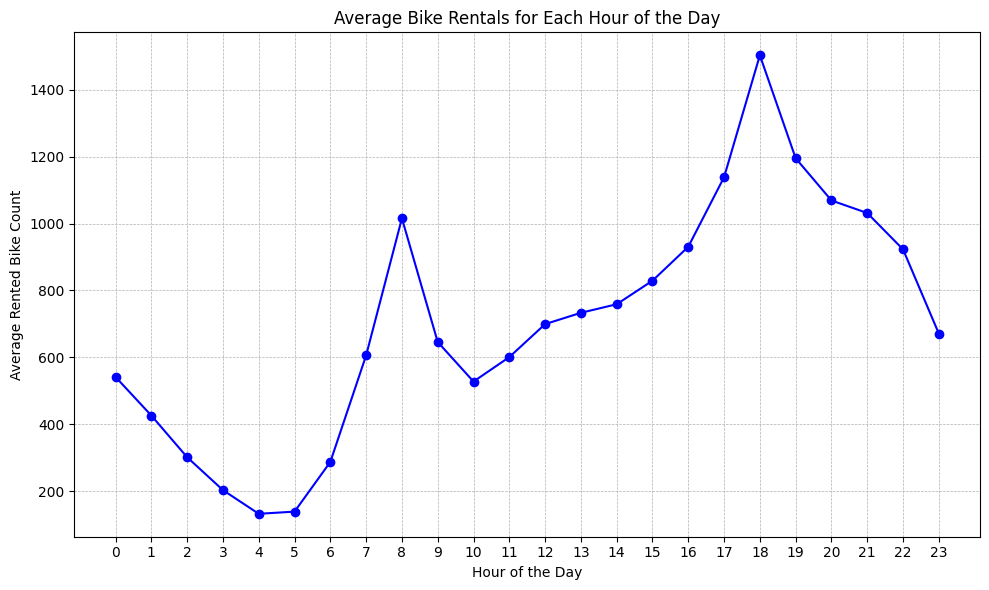

In [23]:
import matplotlib.pyplot as plt
# Extract hours and their corresponding average counts for plotting
hours = list(hourly_averages.keys())
averages = list(hourly_averages.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hours, averages, marker='o', linestyle='-', color='b')
plt.title('Average Bike Rentals for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rented Bike Count')
plt.xticks(hours)  # Set x-ticks to be every hour for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

What about holidays affecting the rented bike count? Maybe there is more of it on holidays or maybe not?

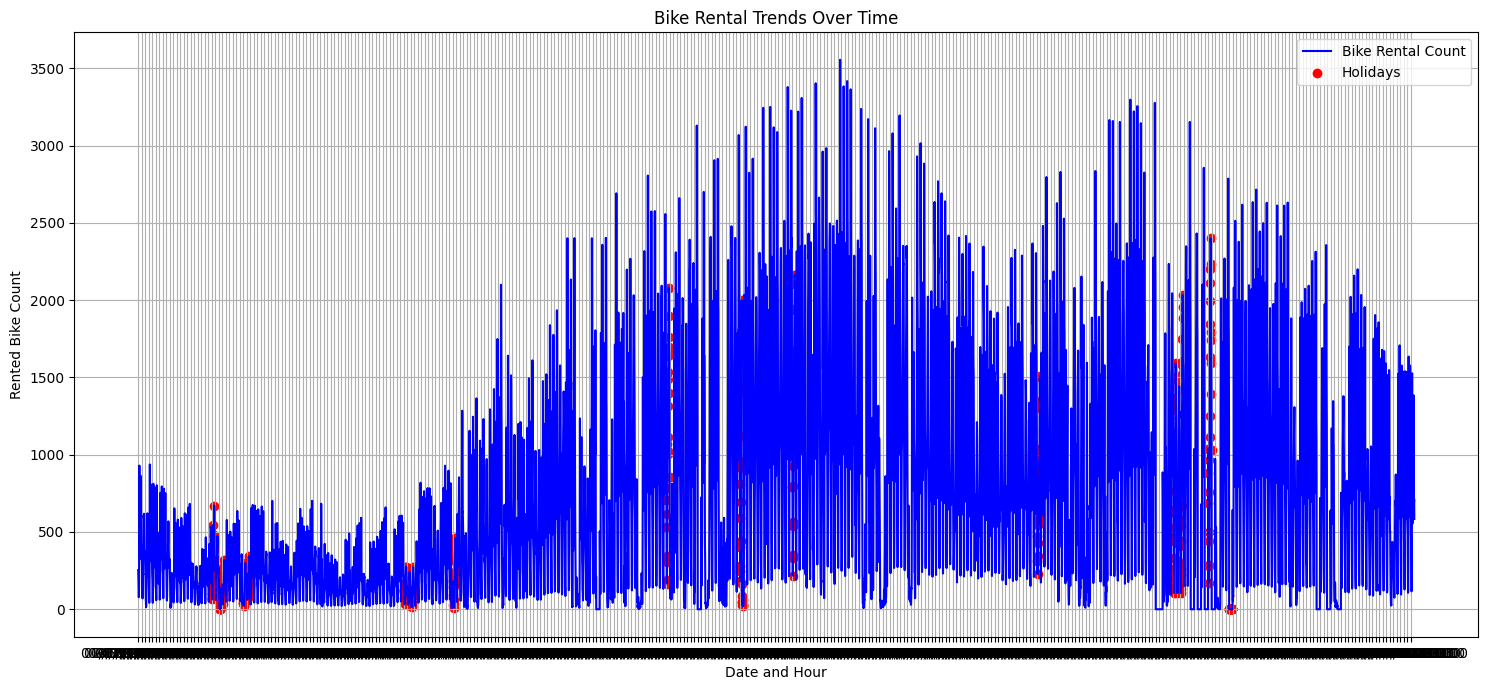

In [24]:
#Create a line chart showing bike rental trends over time. Highlight days with weekend
# Extract dates, bike counts, and holidays
dates = [record['Date'] + f" {record['Hour']}:00" for record in bike_data]
bike_counts = [record['Rented Bike Count'] for record in bike_data]
holidays = [record['Holiday'] == 'Holiday' for record in bike_data]

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(dates, bike_counts, label='Bike Rental Count', color='blue')
plt.scatter([date for date, holiday in zip(dates, holidays) if holiday], 
            [count for count, holiday in zip(bike_counts, holidays) if holiday], 
            color='red', label='Holidays')
plt.title('Bike Rental Trends Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Rented Bike Count')
plt.xticks(dates[::24])  # Show every 24th tick for clarity
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Okay, let's move on to the weather conditions
Is there a relationship between temperature and bike rentals? What about rainfall and bike rentals?

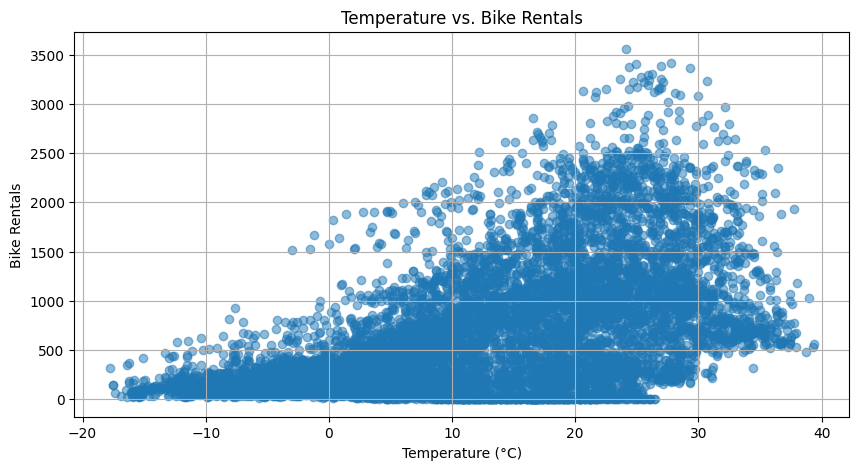

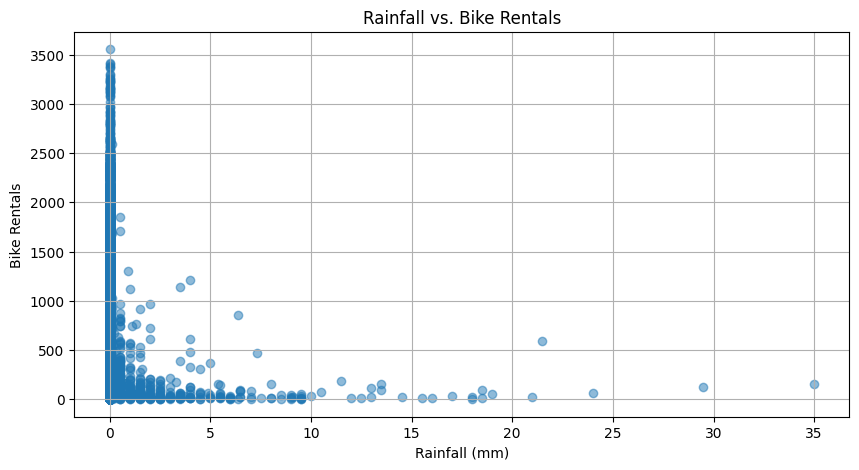

In [25]:


#We can do it visually by observing the relationship on a graph
import matplotlib.pyplot as plt

# Extract relevant data
temperatures = [record['Temperature(°C)'] for record in bike_data]
rainfalls = [record['Rainfall(mm)'] for record in bike_data]
bike_counts = [record['Rented Bike Count'] for record in bike_data]

# Plotting temperature vs. bike rentals
plt.figure(figsize=(10, 5))
plt.scatter(temperatures, bike_counts, alpha=0.5)
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Bike Rentals')
plt.grid(True)
plt.show()

# Plotting rainfall vs. bike rentals
plt.figure(figsize=(10, 5))
plt.scatter(rainfalls, bike_counts, alpha=0.5)
plt.title('Rainfall vs. Bike Rentals')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Bike Rentals')
plt.grid(True)
plt.show()




There does seem to be a pattern between the number of bikes rented, hour of day and the weather conditions. Which conditions do you think 
cause the most bike rental count and the bike rental company should be prepared for? <br>
Correlation Analysis: Check the correlation between numerical features (like temperature, humidity, wind speed, etc.) and the bike rental count. A high positive correlation indicates that as the feature value increases, the bike rental count also tends to increase. <br>
Categorical Analysis: For categorical features like seasons, holidays, and functioning days, we can compute the average bike rental count for each category and compare. <br>
Visualization: Plotting the data can provide insights into patterns and relationships. <br>

Correlations with Rented Bike Count:
Temperature(°C): 0.54
Humidity(%): -0.20
Wind speed (m/s): 0.12
Visibility (10m): 0.20
Solar Radiation (MJ/m2): 0.26
Rainfall(mm): -0.12
Snowfall (cm): -0.14

Average Rented Bike Count by Category:

Seasons:
Autumn: 819.60
Spring: 730.03
Winter: 225.54
Summer: 1034.07

Holiday:
No Holiday: 715.23
Holiday: 499.76

Functioning Day:
No: 0.00
Yes: 729.16


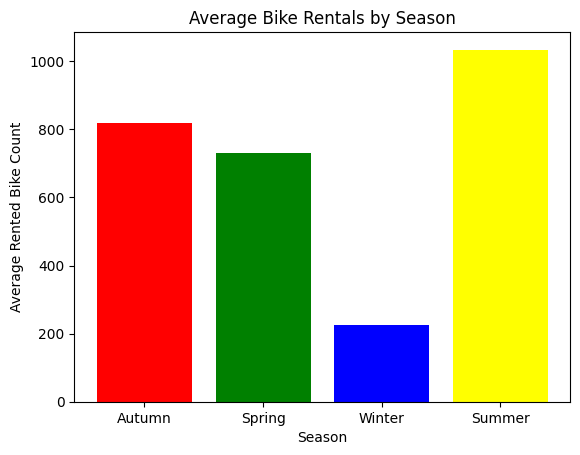

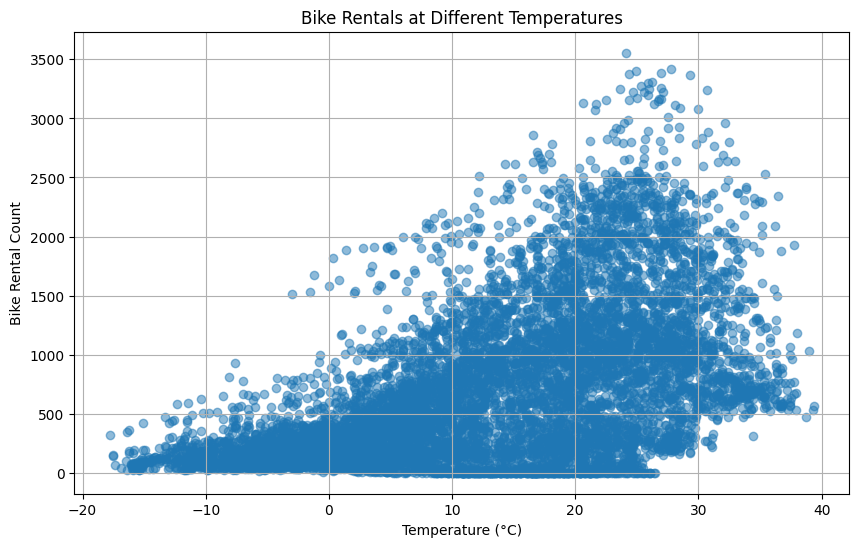

In [27]:
import numpy as np


numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
correlations = {feature: np.corrcoef([record[feature] for record in bike_data], [record['Rented Bike Count'] for record in bike_data])[0, 1] for feature in numerical_features}

print("Correlations with Rented Bike Count:")
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.2f}")


categories = ['Seasons', 'Holiday', 'Functioning Day']
averages = {category: {} for category in categories}

for category in categories:
    unique_values = set(record[category] for record in bike_data)
    for value in unique_values:
        avg_count = np.mean([record['Rented Bike Count'] for record in bike_data if record[category] == value])
        averages[category][value] = avg_count

print("\nAverage Rented Bike Count by Category:")
for category, values in averages.items():
    print(f"\n{category}:")
    for value, avg in values.items():
        print(f"{value}: {avg:.2f}")


# Example: Plotting average bike rentals by season
seasons = list(averages['Seasons'].keys())
avg_counts = list(averages['Seasons'].values())

plt.bar(seasons, avg_counts, color=['red', 'green', 'blue', 'yellow'])
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.show()




### Let's see if we can help Seoul Bike Sharing System withlooking into the future, forecasting bike rental count for the next N hours (e.g., the next 24 hours)

See if you can use rolling average model to smooth out fluctuations caused by short-term irregularities in the historical data. This approach should help in identifying more stable trends and assist in more accurate demand prediction.

In [29]:
# Define the window size for the rolling average
window_size = 3  # for example, average over the previous 3 hours

# Initialize a list to store the rolling averages
rolling_averages = []

# We will start calculating rolling averages from the point where we have enough "previous" points
for i in range(window_size, len(bike_data)):
    # Calculate the sum of 'Rented Bike Count' for the previous hours within the window size
    total_count = sum(bike_data[j]['Rented Bike Count'] for j in range(i - window_size, i))

    # Calculate the average
    average_count = total_count / window_size

    # Store the rolling average along with the corresponding hour for later reference
    rolling_averages.append({'Hour': bike_data[i]['Hour'], 'RollingAverage': average_count})

# Now, rolling_averages contains the rolling average bike count for each hour, starting from the point where
# we have enough data points to fill the window.

# For forecasting, you might simply use the most recent rolling average as the prediction for the next hour:
if rolling_averages:
    forecast_next_hour = rolling_averages[-1]['RollingAverage']
    print(f"Forecasted bike count for the next hour: {forecast_next_hour}")


Forecasted bike count for the next hour: 723.3333333333334


How would you check if your method works well? How would you check the error?

In [38]:
"""One of the common metrics used for this purpose is the Mean Absolute Error (MAE). 
The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. 
It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight."""
# Define the window size for the rolling average
window_size = 3  # for example, average over the previous 3 hours

# Initialize a list to store the rolling averages
rolling_averages = []

# We will start calculating rolling averages from the point where we have enough "previous" points
for i in range(window_size, len(bike_data)):
    # Calculate the sum of 'Rented Bike Count' for the previous hours within the window size
    total_count = sum(bike_data[j]['Rented Bike Count'] for j in range(i - window_size, i))

    # Calculate the average
    average_count = total_count / window_size

    # Store the rolling average along with the corresponding hour and actual count for later reference
    rolling_averages.append({
        'Hour': bike_data[i]['Hour'],
        'RollingAverage': average_count,
        'Actual': bike_data[i]['Rented Bike Count']  # actual bike count for this hour
    })

# Now, to calculate the Mean Absolute Error (MAE), we will compare the 'RollingAverage' with 'Actual'
errors = []

for record in rolling_averages:
    actual_count = record['Actual']
    forecasted_count = record['RollingAverage']
    # Calculate the absolute error for this specific record
    absolute_error = abs(forecasted_count - actual_count)
    errors.append(absolute_error)

# Calculate the mean of all absolute errors
if errors:
    mae = sum(errors) / len(errors)
    print(f"Mean Absolute Error (MAE) for our forecasts is: {mae}")
else:
    print("Not enough data to calculate MAE.")

# A lower MAE value will indicate better accuracy of the forecasts, with zero being perfect accuracy.


Mean Absolute Error (MAE) for our forecasts is: 261.7099843934386
